In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data_augmented_syn_r1.csv', header=None)

In [3]:
df.shape

(2012, 211)

In [4]:
df.iloc[:,:]

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,22737.800000,22794.550000,22838.090000,22878.040000,22917.190000,22955.040000,22989.020000,23024.610000,23058.980000,23089.840000,...,26526.820000,26534.680000,26551.640000,26558.170000,26553.740000,26526.760000,26492.540000,26458.270000,26427.100000,0.0
1,22587.250000,22644.140000,22689.890000,22733.220000,22773.140000,22809.700000,22844.760000,22880.750000,22913.430000,22943.730000,...,26348.610000,26360.020000,26375.040000,26378.770000,26371.880000,26348.650000,26318.480000,26286.830000,26256.980000,0.0
2,23174.920000,23229.310000,23273.050000,23313.140000,23350.940000,23389.690000,23426.510000,23462.940000,23496.930000,23526.080000,...,27019.840000,27032.260000,27046.130000,27049.710000,27039.570000,27018.820000,26986.030000,26955.330000,26923.610000,0.0
3,25595.280000,25660.320000,25709.560000,25758.750000,25799.040000,25839.560000,25878.280000,25918.860000,25961.870000,25991.880000,...,29802.980000,29814.190000,29827.430000,29831.970000,29822.240000,29797.190000,29760.350000,29725.010000,29690.110000,0.0
4,23691.570000,23748.710000,23797.400000,23841.240000,23883.830000,23925.560000,23963.340000,24001.410000,24036.100000,24068.840000,...,27607.400000,27615.560000,27625.340000,27629.100000,27621.530000,27594.100000,27558.120000,27524.900000,27495.080000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,-0.924692,-2.642882,-1.090078,-1.529628,-0.691877,0.093386,0.127737,0.066207,-0.192838,-1.494633,...,-0.563074,-0.112041,0.009795,-0.357559,-0.767329,0.902161,0.436195,-0.079651,-0.241963,2.0
2008,-0.229181,0.663980,0.797612,0.635517,2.169920,-0.518710,0.813449,1.555300,0.663526,0.416241,...,-0.789256,-0.837609,-1.049108,-0.491898,0.953487,-0.812451,-0.013732,0.043109,0.497078,0.0
2009,-0.586948,-0.569040,1.209246,-0.550650,1.051291,1.358125,0.741660,0.332538,-0.289120,-1.361120,...,0.282863,-1.335124,0.817739,0.548996,0.167132,0.034561,-1.215973,-0.156694,-0.295347,2.0
2010,-0.212219,-1.442873,0.322456,-2.052292,-0.041308,-1.756209,-0.895972,1.024593,0.533528,-0.080502,...,-1.381569,-0.114280,-0.970730,-1.004400,0.078748,-1.650953,1.199942,-0.277118,-0.777536,2.0


In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [6]:
x.shape

(2012, 210)

In [7]:
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [8]:
x[1].shape

(210, 1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
x_train[0].shape

(210, 1)

In [11]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D
from tensorflow.keras.models import Sequential

In [12]:
#create sequential model
model = Sequential()
#First CNN layer  with 32 filters,relu activation and same padding
model.add(Conv1D(filters=32, kernel_size=15, padding='same', activation='relu', input_shape=x_train[0].shape))
#second CNN layer with Max pooling
model.add(MaxPool1D(strides=2))
#Flatten the Output
model.add(Flatten())
#Adding a dense layer with 32 neurons
model.add(Dense(32, activation='relu'))
#Adding a dense layer with 64 neurons
model.add(Dense(64, activation='relu'))
#Softmax as last layer with 3 outputs
model.add(Dense(3, activation='softmax'))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 210, 32)           512       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 105, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3360)              0         
                                                                 
 dense (Dense)               (None, 32)                107552    
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                        

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train[..., None], y_train, epochs=100, batch_size=100, validation_data=(x_test[..., None],y_test))

Epoch 1/100
17/17 [==============================] - 1s 20ms/step - loss: 34.9364 - accuracy: 0.4270 - val_loss: 50.2033 - val_accuracy: 0.4864
Epoch 2/100
17/17 [==============================] - 0s 9ms/step - loss: 18.1208 - accuracy: 0.5109 - val_loss: 4.7468 - val_accuracy: 0.5236
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 7.1156 - accuracy: 0.6663 - val_loss: 6.5962 - val_accuracy: 0.6253
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 5.4498 - accuracy: 0.7228 - val_loss: 23.0619 - val_accuracy: 0.6849
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 5.4227 - accuracy: 0.7887 - val_loss: 4.4469 - val_accuracy: 0.7146
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 6.2959 - accuracy: 0.8310 - val_loss: 11.4829 - val_accuracy: 0.7469
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 5.0693 - accuracy: 0.8409 - val_loss: 6.5314 - val_accuracy: 0.7469
Epoch 8

17/17 [==============================] - 0s 10ms/step - loss: 0.0308 - accuracy: 0.9963 - val_loss: 0.8556 - val_accuracy: 0.7792
Epoch 59/100
17/17 [==============================] - 0s 12ms/step - loss: 0.0245 - accuracy: 0.9975 - val_loss: 0.8454 - val_accuracy: 0.7767
Epoch 60/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0306 - accuracy: 0.9963 - val_loss: 0.8860 - val_accuracy: 0.7792
Epoch 61/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0382 - accuracy: 0.9969 - val_loss: 0.9430 - val_accuracy: 0.7792
Epoch 62/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0551 - accuracy: 0.9950 - val_loss: 0.8779 - val_accuracy: 0.7742
Epoch 63/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0207 - accuracy: 0.9963 - val_loss: 0.8944 - val_accuracy: 0.7792
Epoch 64/100
17/17 [==============================] - 0s 10ms/step - loss: 0.0223 - accuracy: 0.9956 - val_loss: 0.8852 - val_accuracy: 0.7792
Epoch 65/100

In [14]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy for 1DCNN: %.2f' % (accuracy*100))


13/13 [==============================] - 0s 1ms/step - loss: 1.0399 - accuracy: 0.7792
Accuracy for 1DCNN: 77.92


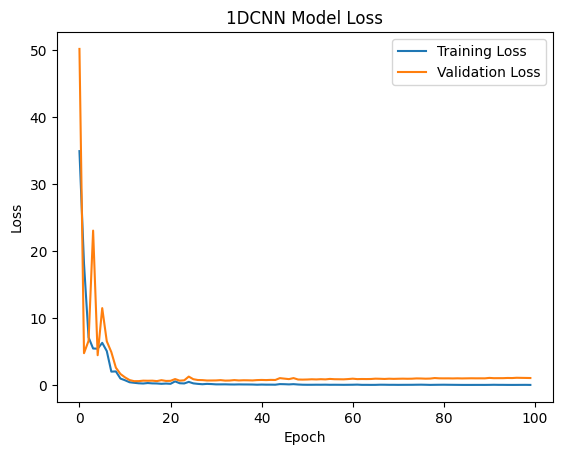

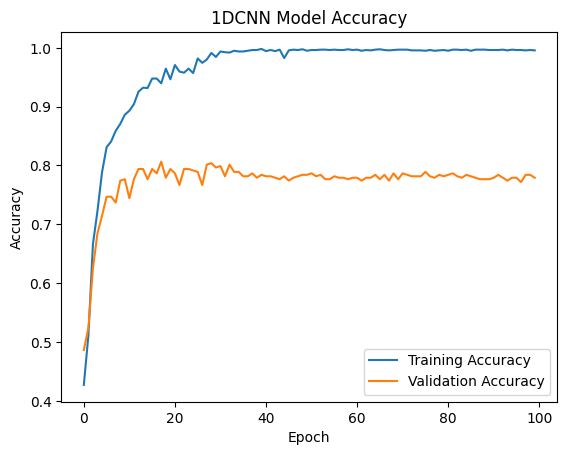

In [15]:

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('1DCNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('1DCNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

13/13 [==============================] - 0s 984us/step


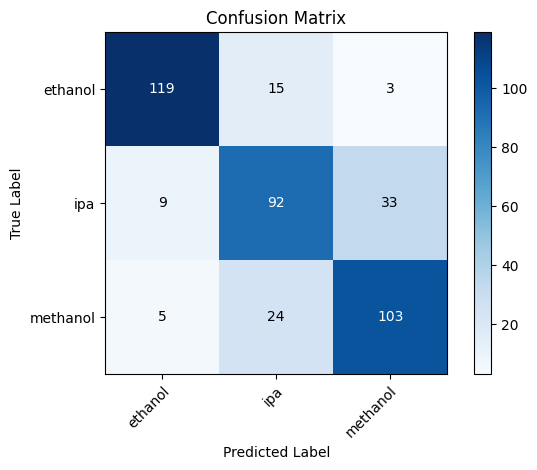

In [16]:
from sklearn.metrics import confusion_matrix


# Generate predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Define class names
class_names = ['ethanol', 'ipa', 'methanol']

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names,
       yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True Label',
       xlabel='Predicted Label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report

# Generate predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))


13/13 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

     ethanol       0.89      0.87      0.88       137
         ipa       0.70      0.69      0.69       134
    methanol       0.74      0.78      0.76       132

    accuracy                           0.78       403
   macro avg       0.78      0.78      0.78       403
weighted avg       0.78      0.78      0.78       403

